# About Dataset

### Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content
The dataset contains several parameters which are considered important during the application for Masters Programs. 
The parameters included are :
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

### Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

### Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.


### Citation
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualizations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.


**[Kaggle link](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)**


# First look at data

I am going to start with importing necessary libraries and viewing the data itself

In [277]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("data/Admission_Predict.csv", index_col=0)

In [278]:
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


In [279]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


Okay, we don't have any missing values and what even better - categorical values, so that makes our work much easier

# Deeper data exploration

I am going to start with splitting the dataset into y and X, where y is a target, which in our case means chance of admission and X are features with what I am trying to predict the chance of admission

In [281]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

In [282]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [283]:
y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
396    0.82
397    0.84
398    0.91
399    0.67
400    0.95
Name: Chance of Admit , Length: 400, dtype: float64

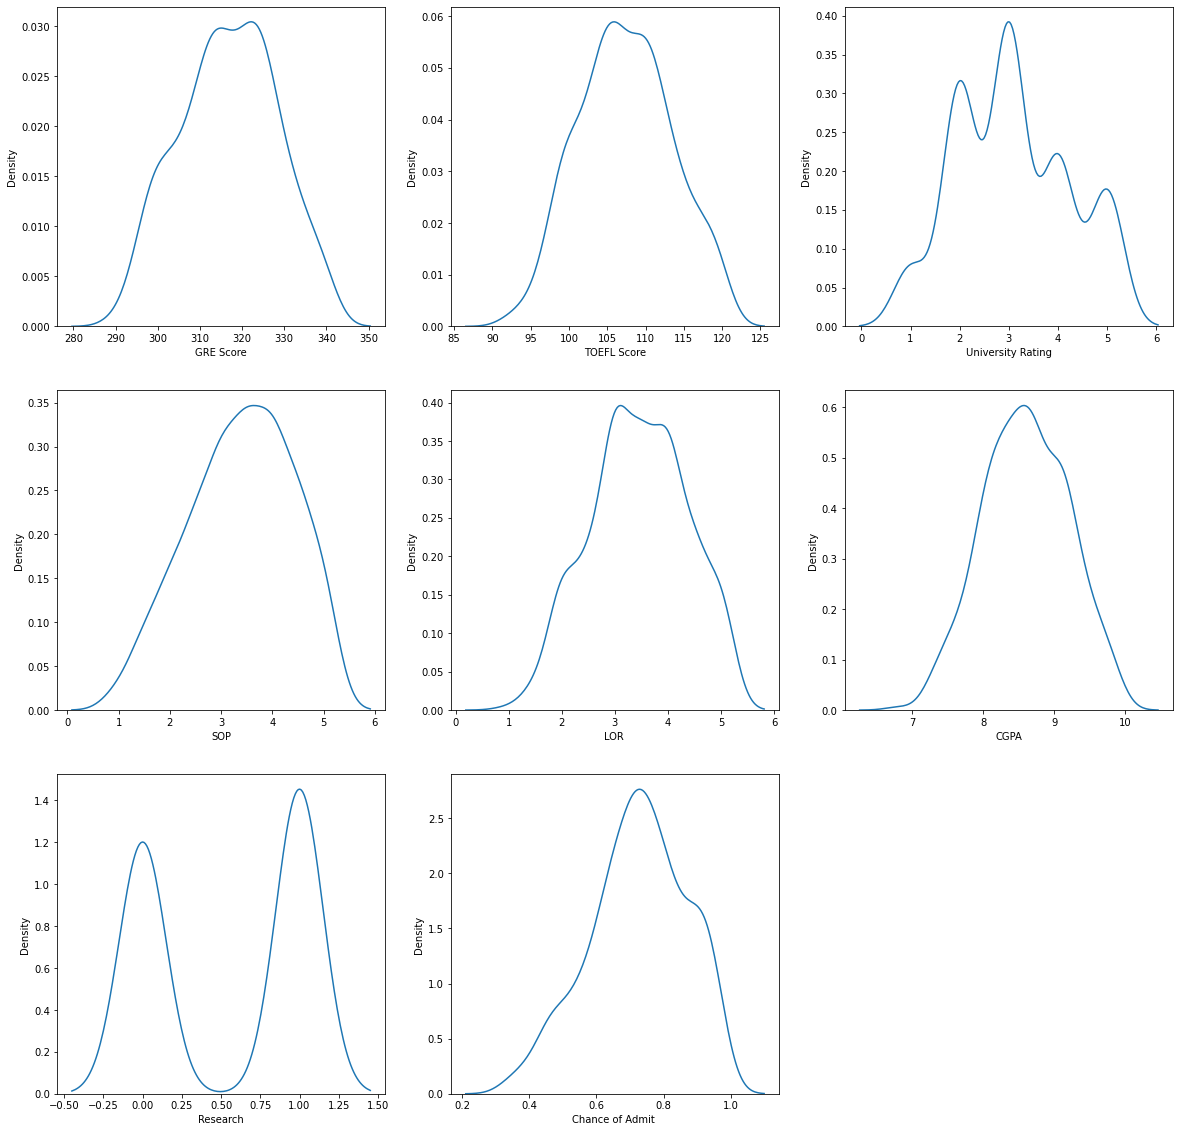

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats

plt.figure(figsize=(20,20))
for i, col in enumerate (data.columns,1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=data[col])



Okay the data seems normally distributed, so I won't apply any transformations, except from StandardScaler, which I will use fo further visualize with Principal Component Analysis

In [285]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X = pd.DataFrame(standard.fit_transform(X), columns=X.columns, index=X.index)
X.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
4,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
5,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975
6,1.151249,1.252078,1.674257,1.093864,-0.504260,1.244310,0.909112
7,0.365860,0.262293,-0.076600,-0.397769,0.610127,-0.669819,0.909112
8,-0.768590,-1.057420,-0.952029,-0.397769,0.610127,-1.173537,-1.099975
9,-1.292182,-0.892456,-1.827457,-1.392191,-2.175842,-1.005631,-1.099975


Now I will use PCA to plot the data, so I can do some conclusion (if I have any)

In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'], index=X.index)

In [287]:
X_pca

,PC1,PC2
Serial No.,,
1,-3.543521,-0.324142
2,-1.631253,0.078057
3,0.570107,-0.681066
4,-0.296114,-1.303278
5,2.061638,0.036091
...,...,...
396,-1.021643,-0.865349
397,-0.718042,-1.006186
398,-3.218506,0.073211


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

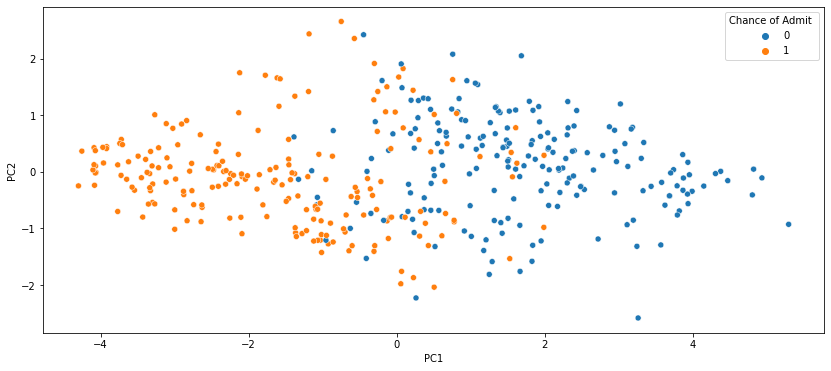

In [288]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=X_pca.iloc[:,0], y=X_pca.iloc[:,1],hue=y.apply(lambda x: 0 if x<y.mean() else 1))

Looks like we have some outliers, that correspond to minimum of PC2 and max of PC1. Let's investigate why that has happened and this will also convey us the knowledge of how the PCA reduced the dimensionality and the knowledge of PCA features and what kind of meaning they have

In [289]:
pc1_max = np.argmax(X_pca.iloc[:,0].values)
pc2_min = np.argmin(X_pca.iloc[:,1].values)
pc2_max =np.argmax(X_pca.iloc[:,1].values)
pc1_max, pc2_min

(347, 273)

In [290]:
data.iloc[pc2_min, :]


GRE Score            312.00
TOEFL Score           99.00
University Rating      1.00
SOP                    1.00
LOR                    1.50
CGPA                   8.01
Research               1.00
Chance of Admit        0.52
Name: 274, dtype: float64

In [291]:
data.iloc[pc1_max, :]

GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.34
Research               0.00
Chance of Admit        0.42
Name: 348, dtype: float64

In [292]:
data.iloc[pc2_max, :]

GRE Score            303.00
TOEFL Score          105.00
University Rating      5.00
SOP                    5.00
LOR                    4.50
CGPA                   8.65
Research               0.00
Chance of Admit        0.77
Name: 132, dtype: float64

So, the PC1 indicates something like the likeness of admission based on Score values, on the other hand PC2 shows the difference between students according to other features such as SOP, LOR etc.

# Modeling

So here when the data is normalized and scaled I can start creating models that will actually make predictions, and the first thing to do is to define function that cross validate the models

In [293]:
from sklearn.model_selection import cross_val_score

def score(model, X,y):
    return np.mean(-1*cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error'))


And here come the models

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Lars
from sklearn.neural_network import MLPRegressor

lin = LinearRegression()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
xgb = XGBRegressor()
neighbors = KNeighborsRegressor()
svm = SVR()
lasso  = Lasso()
elastic = ElasticNet()
laslar = LassoLars()
ridge = BayesianRidge()
gaussian = GaussianProcessRegressor()
lars = Lars()
neural = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', verbose=0)



In [295]:
res = {x.__class__.__name__: score(x, X,y) for x in [lin, forest, tree, xgb, neighbors, svm, lasso, elastic, laslar,ridge,gaussian, lars, neural]}
pd.Series(res)

LinearRegression            0.049487
RandomForestRegressor       0.052384
DecisionTreeRegressor       0.065750
XGBRegressor                0.055403
KNeighborsRegressor         0.054935
SVR                         0.067363
Lasso                       0.115229
ElasticNet                  0.115229
LassoLars                   0.115229
BayesianRidge               0.049449
GaussianProcessRegressor    0.121852
Lars                        0.049487
MLPRegressor                0.114256
dtype: float64

In [296]:
min(res, key=res.get)


'BayesianRidge'

Bayessian Ridge is an absolute winner here

Thanks for reading!